![](img/572_banner.png)
%%HTML
<script src="require.js"></script>

# Appendix A: Gradients Review

## Introduction
<hr>

This short appendix provides a refresher on gradients and calculus. Here we'll cover the basics of the subject in this appendix. This material has been modified after material originally created by [Mike Gelbart](https://www.mikegelbart.com/).

In [1]:
# Auto-setup when running on Google Colab
import os
if 'google.colab' in str(get_ipython()) and not os.path.exists('/content/neural-networks'):
    !git clone -q https://github.com/fum-cs/neural-networks.git /content/neural-networks
    !pip --quiet install -r /content/neural-networks/requirements_colab.txt
    %cd neural-networks/notebooks

In [45]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import data
from skimage.color import rgb2gray
from skimage.filters import gaussian

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16,
                     'axes.labelweight': 'bold',
                     'axes.grid': False,
                     'figure.figsize': (8,6)})
import plotly.io as pio
pio.renderers.default = 'notebook'

## Functions of Multiple Variables
<hr>

- We can write such a function as $f(x,y,z)$ (for 3 inputs) or $f(x)$ if $x$ is a vector.
- Example: $f(x,y,z) = x^2 + y^2 + e^z + x^z + xyz$.

In [3]:
def f(x, y, z):
    return x**2 + y**2 + np.exp(z) + np.power(x,z) + x*y*z

f(1,2,3)

32.08553692318767

- Another example: $f(x,y) = \sin(xy)$
- We can visualize functions of two variables, but it gets much harder after that.

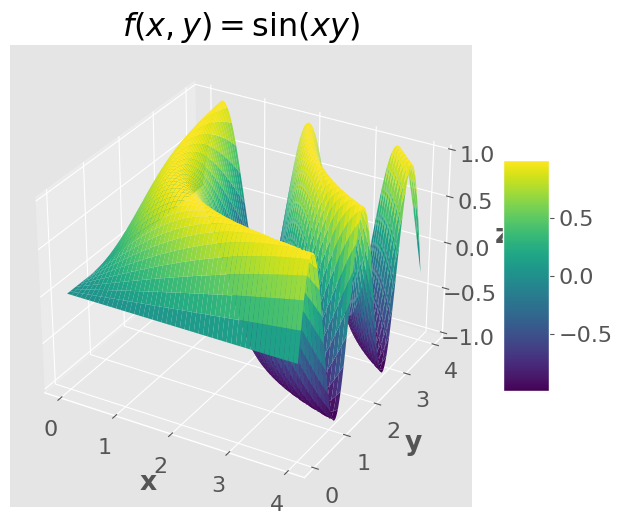

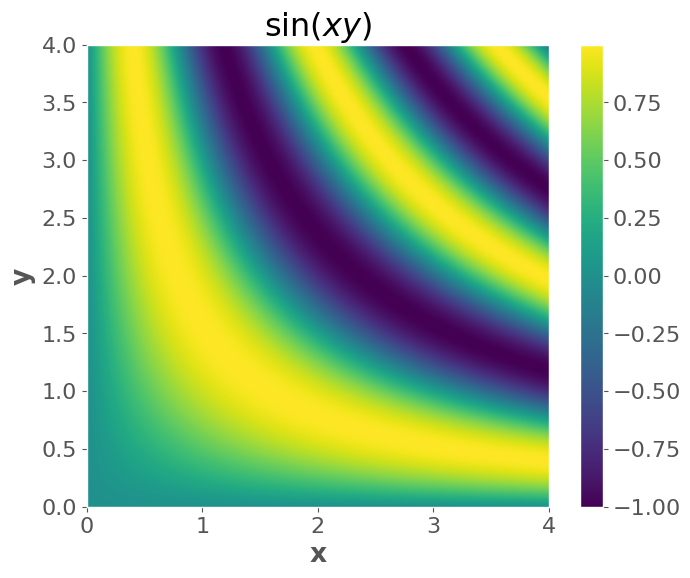

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
f = lambda x, y: np.sin(x * y)

# Create the grid
x = np.linspace(0, 4, 1000)
y = np.linspace(0, 4, 1000)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with the 'plasma' colormap
surf = ax.plot_surface(xx, yy, zz, cmap='viridis')

# Set labels and title
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("$f(x,y) = \sin(xy)$")

# Add a colorbar for the 3D plot
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()

# Create the 2D plot
plt.imshow(zz, extent=(np.min(x), np.max(x), np.min(y), np.max(y)), origin="lower")
plt.xlabel("x")
plt.ylabel("y")
plt.title("$\sin(xy)$")
plt.colorbar()
plt.show()

## Vector-valued Functions
<hr>

- You may not have encountered these yet in MDS.
- These are functions with multiple _outputs_ (and may or may not have multiple _inputs_).
- Example with 1 input and 3 outputs:

$$f(x)=\begin{bmatrix} x^2 \\ 2x \\ -x\end{bmatrix}$$

- Example with 3 inputs and 4 outputs:

$$f(x,y,z)=\begin{bmatrix} yz^2 \\ 0 \\ xyz \\ x-y\end{bmatrix}$$

- Example with 2 inputs and 2 outputs:

$$f(x,y)=\begin{bmatrix} x \\ \sin(y) \end{bmatrix}$$

In [5]:
def f(x, y):
    return np.array([x, np.sin(y)])


f(2, 10)

array([ 2.        , -0.54402111])

We can visualize functions with two outputs (and two inputs), but it gets much harder after that.

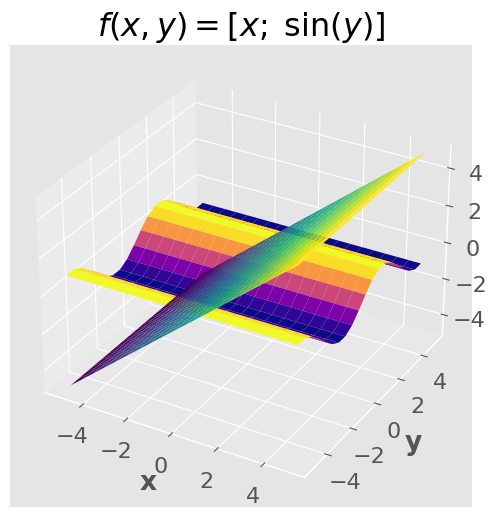

In [13]:
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(xx, yy, zz[0], cmap='viridis')  # Plot x component
ax.plot_surface(xx, yy, zz[1], cmap='plasma')  # Plot sin(y) component

# Set labels and title
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("$f(x,y) = [x; \; \sin(y)]$")

plt.show()

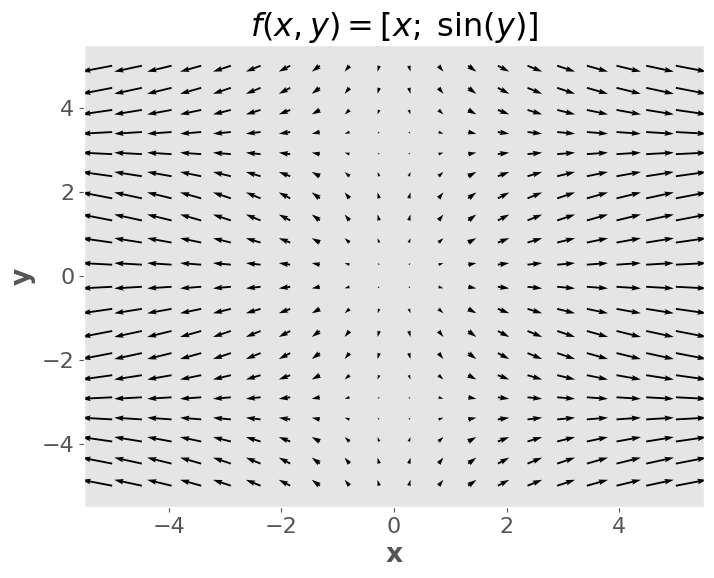

In [7]:
plt.quiver(xx, yy, zz[0], zz[1])
# plt.axis('square');
plt.xlabel("x")
plt.ylabel("y")
plt.title("$f(x,y) = [x; \; \sin(y)]$")
plt.show()

Notes:

- For a fixed $y$, when $x$ grows, the $x$-component of the output grows (horizontal length of the arrows)
- A similar argument can be made for $y$.
- It's not always the case that the number of inputs equals the number of outputs - this is a special case!
  - But it's a very important special case, as we'll see below.
  - What it means is that the "input space" and the "output space" are the same.
  - Which allows for this kind of visualization.
- (optional) It's not always the case that the $i$th component of the output depends on the $i$th component of the inputs - this is also a special case!

## Partial Derivatives
<hr>

- A partial derivative is just a derivative of a multivariable function with respect to one of the input variables.
- When taking this derivative, we treat all the other variables as constants.
- Example: let $f(x,y,z) = x^2 + y^2 + e^x + x^z + xyz$, let's compute $\frac{\partial}{\partial x} f(x,y,z)$

$$\begin{align}\frac{\partial}{\partial x} \quad &x^2 &+ \quad &y^2 &+ \quad &e^x &+ \quad &x^z &+ \quad &xyz\\=\quad &2x &+ \quad &0 &+\quad  &e^x &+ \quad &zx^{z-1} &+ \quad &yz\end{align}$$

- **Important note**: $\frac{\partial f}{\partial x} $ is itself a function of $x,y,z$, not just a function of $x$. Think about the picture from the PDF slide above: the slope depends on your position in all coordinates.
- (optional) Thus, the partial derivative operator $\frac{\partial}{\partial x}$ maps from multivariate functions to multivariable functions.

## Gradients
<hr>

- This is the easy part: a gradient is just a box holding all the $d$ partial derivatives (assuming you have a function of $d$ variables). For example, when $d=3$:
 
$$\nabla f(x,y,z)=\begin{bmatrix}\frac{\partial f}{\partial x}(x,y,z)\\ \frac{\partial f}{\partial y}(x,y,z) \\\frac{\partial f}{\partial z}(x,y,z)\end{bmatrix}$$

Or, more generally, if $x$ is a vector then

$$\nabla f(x)=\begin{bmatrix}\frac{\partial f}{\partial x_1}(x)\\ \frac{\partial f}{\partial x_2}(x) \\ \vdots \\ \frac{\partial f}{\partial x_d}(x)\end{bmatrix}$$


- (optional) Thus, a partial derivative is a function that maps from the original space to the real numbers, e.g. $\mathbb{R}^3\rightarrow \mathbb{R}$ ("R three to R").
- (optional) a gradient is a function that maps from the original input space to the same space, e.g. $\mathbb{R}^3\rightarrow \mathbb{R}^3$ ("R three to R three").

**Notation warning**: we use the term "derivative" or "gradient" to mean three different things:

1. Operator (written $\frac{d}{dx}$ or $\nabla$), which maps **functions to functions**; "now we take the gradient".
2. Function (written $\frac{df}{dx}$ or $\nabla f$), which maps **vectors to vectors**; "the gradient is $2x+5$"
    - This is what you get after applying the operator to a function.
3. Value (written as a number or vector), which is **just a number or vector**; "the gradient is  $\begin{bmatrix}-2.34\\6.43\end{bmatrix}$"
    - This is what you get after applying the function to an input.
  
This is extremely confusing!

Here's a table summarizing the situation, assuming 3 variables (in general it could be any number)

|  Name   | Operator | Function | Maps  | Example Value  |
|---------|----------|-----------|------|----------|
| Derivative | $\frac{d}{dx}$ | $\frac{df}{dx}(x)$ | $\mathbb{R}\rightarrow \mathbb{R}$ | $2.5$ |
| Partial Derivative |  ${\frac{\partial}{\partial x}}$ |  ${\frac{\partial f}{\partial x}}(x,y,z)$ | ${\mathbb{R}^3\rightarrow \mathbb{R}}$ | $2.5$ |
| Gradient |  $\nabla$ | $\nabla f(x,y,z)$ |$\mathbb{R}^3\rightarrow \mathbb{R}^3$ | $\begin{bmatrix}2.5\\0\\-1\end{bmatrix}$ |

### Gradients intuition

Since a gradient is a vector, we can talk about its magnitude and direction.
  - The magnitude is $\|\nabla f\|$ and tells us **how fast things are changing**.
  - The direction is $\frac{\nabla f}{\|\nabla f \|}$ and tells us **the direction of fastest change** or the steepest direction.

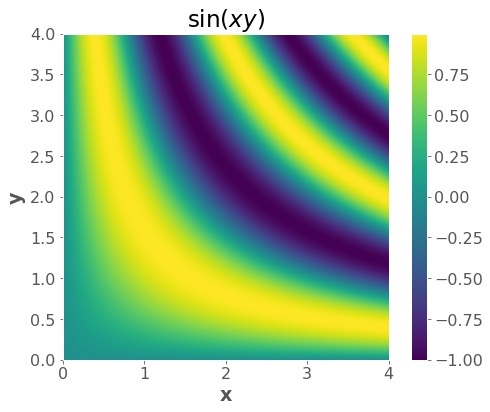

In [ ]:
# gradient vector field
f = lambda x, y: np.sin(x * y)

x = np.linspace(0, 4, 1000)
y = np.linspace(0, 4, 1000)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

plt.imshow(zz, extent=(np.min(x), np.max(x), np.min(y), np.max(y)), origin="lower")
plt.xlabel("x")
plt.ylabel("y")
plt.title("$\sin(xy)$")
plt.colorbar()

$$\nabla \sin(xy) = \begin{bmatrix} y \cos(xy)\\x\cos(xy)\end{bmatrix}$$

In [16]:
gradf = lambda x, y: (y * np.cos(x * y), x * np.cos(x * y))

xsmall = np.linspace(0, 4, 15)
ysmall = np.linspace(0, 4, 15)
xxsmall, yysmall = np.meshgrid(xsmall, ysmall)
gradx, grady = gradf(xxsmall, yysmall)

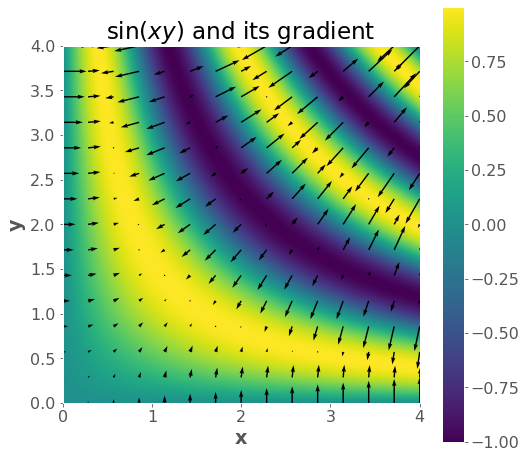

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(zz,extent=(np.min(x), np.max(x), np.min(y), np.max(y)), origin='lower')
plt.colorbar()
plt.quiver(xxsmall,yysmall,gradx,grady)
plt.xlabel("x")
plt.ylabel("y")
plt.title("$\sin(xy)$ and its gradient")

### Why is it the direction of fastest increase?

For example if the gradient is:

$$\begin{bmatrix} 5 \\ 2 \\ -1 \\ 0 \end{bmatrix}\, ,$$

why go in the gradient direction instead of the $x_1$ direction, since that first component has the biggest partial derivative. Doesn't it seem wasteful to go partly in those other directions?

First, a proof that the gradient is the best direction. Let's say we are at position $x$ and we move by an infinitesimal (i.e. extremely tiny) $v$, which is a vector having components $v_1, v_2, \ldots v_d$. The change in $f$ from moving from $x$ to $x+v$ is $\frac{\partial f}{dx_1} v_1 + \frac{\partial f}{dx_2} v_2 + \ldots \frac{\partial f}{dx_d} v_d$, where all the partial derivatives are evaluated at $x$ (I believe this is related to the "total derivative"). In other words, the change in $f$ is the dot product $\nabla f \cdot v$. So now the question is, what vector $v$ of fixed length maximizes $\nabla f \cdot v$. The answer is a vector that points in the same direction as $\nabla f$. (That's a property of the dot product, and is evident by the definition: $a \cdot b = \| a \| \|b \| \cos(\theta)$. Since $\| \nabla f \|$ and $\|v\|$ are fixed in our case, to maximize this we want to maximize $\cos(\theta)$, which means we want $\cos(\theta)=1$ meaning $\theta=0$, or the angle between the vectors is $0$).

Second, the intuition. I think the "paradox" comes from over-privileging the coordinate axes. They are not special in any way! For example if you rotate the coordinate system by 45 degrees, the direction of steepest ascent should also rotate by 45 degrees. Under the suggested system, this would not happen. Why? Well, there is always going to be one element of the gradient that is largest. Does that mean the direction of steepest ascent is always one of the coordinate axis directions? No. That doesn't make sense and also fails the "rotate by 45 degrees test" because the direction will have rotated by 0, 90, 180 or 270 degrees.


### Images as 3D surfaces

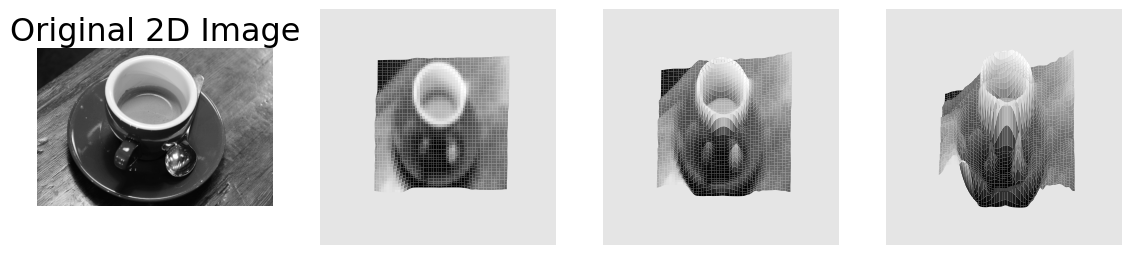

In [47]:
# Load an example image from skimage
coffee = data.coffee()
image = rgb2gray(coffee)

# Apply a Gaussian filter to smooth the image
smoothed_image = gaussian(image, sigma=7)

# Create a meshgrid for the image coordinates
x = np.arange(image.shape[1])
y = np.arange(image.shape[0])
x, y = np.meshgrid(x, y)

# Plot the original and smoothed images side by side with the 3D surface
fig = plt.figure(figsize=(14, 6))

# Plot the original 2D image
ax1 = fig.add_subplot(141)
ax1.imshow(image, cmap='gray')
ax1.set_title('Original 2D Image')
ax1.axis('off')

# Plot the smoothed 3D surface
ax2 = fig.add_subplot(142, projection='3d')
ax2.plot_surface(x, y, smoothed_image[:,::-1], cmap='gray')
ax2.view_init(elev=90, azim=90)
ax2.axis('off')

ax3 = fig.add_subplot(143, projection='3d')
ax3.plot_surface(x, y, smoothed_image[:,::-1], cmap='gray')
ax3.view_init(elev=80, azim=90)
ax3.axis('off')

ax4 = fig.add_subplot(144, projection='3d')
ax4.plot_surface(x, y, smoothed_image[:,::-1], cmap='gray')
ax4.view_init(elev=60, azim=90)
ax4.axis('off')

plt.show()


# Matrix Differentiation

[matrix calculus](https://atmos.washington.edu/~dennis/MatrixCalculus.pdf)

Randal J. Barnes,
Department of Civil Engineering, University of Minnesota.
Minneapolis, Minnesota, USA



## Introduction

Throughout this presentation I have chosen to use a symbolic matrix notation. This choice was not made lightly. I am a strong advocate of index notation, when appropriate. For example, index notation greatly simplifies the presentation and manipulation of differential geometry. As a rule-of-thumb, if your work is going to primarily involve differentiation with respect to the spatial coordinates, then index notation is almost surely the appropriate choice.

In the present case, however, I will be manipulating large systems of equations in which the matrix calculus is relatively simply while the matrix algebra and matrix arithmetic is messy and more involved. Thus, I have chosen to use symbolic notation.

## Notation and Nomenclature

**Definition 1.** Let ${a}_{{i j}} \in \mathbb{R}, {i}=1,2, \ldots, {m}, {j}=1,2, \ldots, {n}$. Then the ordered rectangular array

$$
\mathbf{A}=\left[\begin{array}{cccc}
a_{11} & a_{12} & \cdots & a_{1 n}  \\
a_{21} & a_{22} & \cdots & a_{2 n} \\
\vdots & \vdots & & \vdots \\
a_{{m} 1} & a_{{m} 2} & \cdots & a_{{m} n}
\end{array}\right]
$$

is said to be a real matrix of dimension ${m} \times {n}$.
When writing a matrix I will occasionally write down its typical element as well as its dimension. Thus,

$$
\begin{equation*}
\mathbf{A}=\left[{a}_{{i j}}\right], \quad {i}=1,2, \ldots, {m} ; {j}=1,2, \ldots, \mathbf{n}, 
\end{equation*}
$$

denotes a matrix with $m$ rows and $n$ columns, whose typical element is $a_{i j}$. Note, the first subscript locates the row in which the typical element lies while the second subscript locates the column. For example, ${a}_{{j k}}$ denotes the element lying in the ${j}^{th}$ row and $k^{th}$ column of the matrix $\mathbf{A}$.

**Definition 2.** A vector is a matrix with only one column. Thus, all vectors are inherently column vectors.

**Convention 1**

Multi-column matrices are denoted by boldface uppercase letters: for example, $\mathbf{A}, \mathbf{B}, \mathbf{X}$. Vectors (single-column matrices) are denoted by boldfaced lowercase letters: for example, $\mathbf{a}, \mathbf{b}, \mathbf{x}$. I will attempt to use letters from the beginning of the alphabet to designate known matrices, and letters from the end of the alphabet for unknown or variable matrices.

**Convention 2**

When it is useful to explicitly attach the matrix dimensions to the symbolic notation, I will use an underscript. For example, $\underset{m \times n}{\mathbf{A}}$, indicates a known, multi-column matrix with $m$ rows and $n$ columns.

A superscript ${ }^{\top}$ denotes the matrix transpose operation; for example, $\mathbf{A}^{\top}$ denotes the transpose of $\mathbf{A}$. Similarly, if $\mathbf{A}$ has an inverse it will be denoted by $\mathbf{A}^{-1}$. The determinant of $\mathbf{A}$ will be denoted by either $|\mathbf{A}|$ or $\operatorname{det}(\mathbf{A})$. Similarly, the $\operatorname{rank}$ of a matrix $\mathbf{A}$ is denoted by $\operatorname{rank}(\mathbf{A})$. An identity matrix will be denoted by $I$, and $\mathbf{0}$ will denote a null matrix.


## Matrix Multiplication

**Definition 3.** Let $\mathbf{A}$ be ${m} \times {n}$, and $\mathbf{B}$ be ${n} \times p$, and let the product $\mathbf{A B}$ be

$$
\begin{equation*}
\mathbf{C}=\mathbf{A B} 
\end{equation*}
$$

then $\mathbf{C}$ is a ${m} \times p$ matrix, with element $({i}, {j})$ given by

$$
\begin{equation*}
c_{i j}=\sum_{k=1}^{n} a_{i k} b_{k j} 
\end{equation*}
$$

for all $i=1,2, \ldots, m, \quad j=1,2, \ldots, p$.

**Proposition 1.** Let $\mathbf{A}$ be ${m} \times {n}$, and $\mathbf{x}$ be ${n} \times 1$, then the typical element of the product

$$
\begin{equation*}
\mathbf{z}=\mathbf{A x} 
\end{equation*}
$$

is given by

$$
\begin{equation*}
z_{i}=\sum_{k=1}^{n} a_{i k} x_{k} 
\end{equation*}
$$

for all ${i}=1,2, \ldots, {m}$. Similarly, let $\mathbf{y}$ be $\mathbf{m} \times 1$, then the typical element of the product

$$
\begin{equation*}
\mathbf{z}^{\top}=\mathbf{y}^{\top} \mathbf{A} 
\end{equation*}
$$

is given by

$$
\begin{equation*}
z_{i}=\sum_{k=1}^{n} a_{k i} y_{k} 
\end{equation*}
$$

for all $i=1,2, \ldots, n$. Finally, the scalar resulting from the product

$$
\begin{equation*}
\alpha=\mathbf{y}^{\top} \mathbf{A} \mathbf{x} 
\end{equation*}
$$

is given by

$$
\begin{equation*}
\alpha=\sum_{j=1}^{m} \sum_{k=1}^{n} a_{j k} y_{j} x_{k} 
\end{equation*}
$$

Proof: These are merely direct applications of Definition 3. q.e.d.

**Proposition 2.** Let $\mathbf{A}$ be ${m} \times {n}$, and $\mathbf{B}$ be ${n} \times {p}$, and let the product $\mathbf{A B}$ be

$$
\begin{equation*}
\mathbf{C}=\mathbf{A B} 
\end{equation*}
$$

then

$$
\begin{equation*}
\mathbf{C}^{\top}=\mathbf{B}^{\top} \mathbf{A}^{\top} 
\end{equation*}
$$

Proof: The typical element of $\mathbf{C}$ is given by

$$
\begin{equation*}
c_{i j}=\sum_{k=1}^{n} a_{i k} b_{k j} 
\end{equation*}
$$

By definition, the typical element of $\mathbf{C}^{\top}$, say ${d}_{{i j}}$, is given by

$$
\begin{equation*}
{d}_{{i j}}={c}_{{j i}}=\sum_{{k}=1}^{n} {a}_{{jk}} {b}_{{ki}} 
\end{equation*}
$$

Hence,

$$
\begin{equation*}
\mathbf{C}^{\top}=\mathbf{B}^{\top} \mathbf{A}^{\top} 
\end{equation*}
$$

q.e.d.

**Proposition 3.** Let $\mathbf{A}$ and $\mathbf{B}$ be ${n} \times {n}$ and invertible matrices. Let the product $\mathbf{A B}$ be given by

$$
\begin{equation*}
\mathbf{C}=\mathbf{A B} 
\end{equation*}
$$

then

$$
\begin{equation*}
\mathbf{C}^{-1}=\mathbf{B}^{-1} \mathbf{A}^{-1} 
\end{equation*}
$$

Proof:

$$
\begin{equation*}
\mathbf{C B}^{-1} \mathbf{A}^{-1}=\mathbf{A B B}^{-1} \mathbf{A}^{-1}=I 
\end{equation*}
$$

q.e.d.

## Partioned Matrices (Further Reading)

Frequently, I will find it convenient to deal with partitioned matrices ${ }^{1}$. Such a representation, and the manipulation of this representation, are two of the relative advantages of the symbolic matrix notation.

**Definition 4.** Let $\mathbf{A}$ be $m \times n$ and write

$$
A=\left[\begin{array}{ll}
B & C  \\
D & E
\end{array}\right]
$$

where $\mathbf{B}$ is ${m}_{1} \times {n}_{1}, \mathbf{E}$ is ${m}_{2} \times {n}_{2}, \mathbf{C}$ is ${m}_{1} \times {n}_{2}, \mathbf{D}$ is ${m}_{2} \times {n}_{1}, {m}_{1}+{m}_{2}={m}$, and ${n}_{1}+{n}_{2}={n}$. The above is said to be a partition of the matrix $\mathbf{A}$.

**Proposition 4.** Let $\mathbf{A}$ be a square, nonsingular matrix of order $m$. Partition $\mathbf{A}$ as

$$
\mathbf{A}=\left[\begin{array}{ll}
\mathbf{A}_{11} & \mathbf{A}_{12}  \\
\mathbf{A}_{21} & \mathbf{A}_{22}
\end{array}\right]
$$

so that $\mathbf{A}_{11}$ is a nonsingular matrix of order ${m}_{1}, \mathbf{A}_{22}$ is a nonsingular matrix of order ${m}_{2}$, and ${m}_{1}+{m}_{2}={m}$. Then

$$
\mathbf{A}^{-1}=\left[\begin{array}{cc}
\left(\mathbf{A}_{11}-\mathbf{A}_{12} \mathbf{A}_{22}^{-1} \mathbf{A}_{21}\right)^{-1} & -\mathbf{A}_{11}^{-1} \mathbf{A}_{12}\left(\mathbf{A}_{22}-\mathbf{A}_{21} \mathbf{A}_{11}^{-1} \mathbf{A}_{12}\right)^{-1}  \\
-\mathbf{A}_{22}^{-1} \mathbf{A}_{21}\left(\mathbf{A}_{11}-\mathbf{A}_{12} \mathbf{A}_{22}^{-1} \mathbf{A}_{21}\right)^{-1} & \left(\mathbf{A}_{22}-\mathbf{A}_{21} \mathbf{A}_{11}^{-1} \mathbf{A}_{12}\right)^{-1}
\end{array}\right]
$$

Proof: Direct multiplication of the proposed $\mathbf{A}^{-1}$ and $\mathbf{A}$ yields

$$
\begin{equation*}
\mathbf{A}^{-1} \mathbf{A}=I
\end{equation*}
$$

q.e.d.

## Matrix Differentiation

In the following discussion I will differentiate matrix quantities with respect to the elements of the referenced matrices. Although no new concept is required to carry out such operations, the element-by-element calculations involve cumbersome manipulations and, thus, it is useful to derive the necessary results and have them readily available ${ }^{2}$.

**Convention 3**

Let

$$
\begin{equation*}
\mathbf{y}=\psi(\mathbf{x}) 
\end{equation*}
$$

where $\mathbf{y}$ is an $m$-element vector, and $\mathbf{x}$ is an $n$-element vector. The symbol

$$
\frac{\partial \mathbf{y}}{\partial \mathbf{x}}=\left[\begin{array}{cccc}
\frac{\partial y_{1}}{\partial x_{1}} & \frac{\partial y_{1}}{\partial x_{2}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}  \\
\frac{\partial y_{2}}{\partial x_{1}} & \frac{\partial y_{2}}{\partial x_{2}} & \cdots & \frac{\partial y_{2}}{\partial x_{n}} \\
\vdots & \vdots & & \vdots \\
\frac{\partial y_{m}}{\partial x_{1}} & \frac{\partial y_{m}}{\partial x_{2}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
\end{array}\right]
$$

will denote the $m \times n$ matrix of first-order partial derivatives of the transformation from $\mathbf{x}$ to $\mathbf{y}$. Such a matrix is called the Jacobian matrix of the transformation $\psi()$.

Notice that if $\mathbf{x}$ is actually a scalar in Convention 3 then the resulting Jacobian matrix is a $m \times 1$ matrix; that is, a single column (a vector). On the other hand, if $\mathbf{y}$ is actually a scalar in Convention 3 then the resulting Jacobian matrix is a $1 \times {n}$ matrix; that is, a single row (the transpose of a vector).

**Proposition 5.** Let $\mathbf{y}=\mathbf{A}\mathbf{x} $, 
where $\mathbf{y}$ is ${m} \times 1$, $\mathbf{x}$ is ${n} \times 1, \mathbf{A}$ is ${m} \times {n}$, and $\mathbf{A}$ does not depend on $\mathbf{x}$, then


$$
\begin{equation*}
\frac{\partial \mathbf{y}}{\partial \mathbf{x}}=\mathbf{A} 
\end{equation*}
$$



Proof: Since the $i$ th element of $\mathbf{y}$ is given by

$$
\begin{equation*}
y_{i}=\sum_{k=1}^{n} a_{i k} x_{k} 
\end{equation*}
$$

it follows that

$$
\begin{equation*}
\frac{\partial y_{i}}{\partial x_{j}}=a_{i j} 
\end{equation*}
$$

for all ${i}=1,2, \ldots, {m}, \quad {j}=1,2, \ldots, {n}$. Hence

$$
\begin{equation*}
\frac{\partial \mathbf{y}}{\partial \mathbf{x}}=\mathbf{A} 
\end{equation*}
$$

q.e.d.

**Proposition 6.** Let $\mathbf{y}=\mathbf{A x} $, 
where $\mathbf{y}$ is ${m} \times 1$, $\mathbf{x}$ is ${n} \times 1, \mathbf{A}$ is ${m} \times {n}$, and $\mathbf{A}$ does not depend on $\mathbf{x}$, as in Proposition 5 . Suppose that $\mathbf{x}$ is a function of the vector $\mathbf{z}$, while $\mathbf{A}$ is independent of $\mathbf{z}$. Then

$$
\begin{equation*}
\frac{\partial \mathbf{y}}{\partial \mathbf{z}}=\mathbf{A} \frac{\partial \mathbf{x}}{\partial \mathbf{z}} 
\end{equation*}
$$

Proof: Since the $i$ th element of $\mathbf{y}$ is given by

$$
\begin{equation*}
y_{i}=\sum_{k=1}^{n} a_{i k} x_{k} 
\end{equation*}
$$

for all ${i}=1,2, \ldots, m$, it follows that

$$
\begin{equation*}
\frac{\partial y_{i}}{\partial z_{j}}=\sum_{k=1}^{n} a_{i k} \frac{\partial x_{k}}{\partial z_{j}} 
\end{equation*}
$$

but the right hand side of the above is simply element $({i}, {j})$ of $\mathbf{A} \frac{\partial \mathbf{x}}{\partial \mathrm{z}}$. Hence

$$
\begin{equation*}
\frac{\partial \mathbf{y}}{\partial \mathbf{z}}=\frac{\partial \mathbf{y}}{\partial \mathbf{x}} \frac{\partial \mathbf{x}}{\partial \mathbf{z}}=\mathbf{A} \frac{\partial \mathbf{x}}{\partial \mathbf{z}} 
\end{equation*}
$$

q.e.d.

**Proposition 7.** Let the scalar $\alpha$ be defined by

$$
\begin{equation*}
\alpha=\mathbf{y}^{\top} \mathbf{A} \mathbf{x} 
\end{equation*}
$$

where $\mathbf{y}$ is $\mathrm{m} \times 1, \mathbf{x}$ is $\mathrm{n} \times 1, \mathbf{A}$ is $\mathrm{m} \times \mathrm{n}$, and $\mathbf{A}$ is independent of $\mathbf{x}$ and $\mathbf{y}$, then

$$
\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf{x}}=\mathbf{y}^{\top} \mathbf{A} 
\end{equation*}
$$

and

$$
\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf{y}}=\mathbf{x}^{\top} \mathbf{A}^{\top} 
\end{equation*}
$$

Proof: Define

$$
\begin{equation*}
\mathbf{w}^{\top}=\mathbf{y}^{\top} \mathbf{A} 
\end{equation*}
$$

and note that

$$
\begin{equation*}
\alpha=\mathbf{w}^{\top} \mathbf{x} 
\end{equation*}
$$

Hence, by Proposition 5 we have that

$$
\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf{x}}=\mathbf{w}^{\top}=\mathbf{y}^{\top} \mathbf{A} 
\end{equation*}
$$

which is the first result. Since $\alpha$ is a scalar, we can write

$$
\begin{equation*}
\alpha=\alpha^{\top}=\mathbf{x}^{\top} \mathbf{A}^{\top} \mathbf{y} 
\end{equation*}
$$

and applying Proposition 5 as before we obtain

$$
\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf{y}}=\mathbf{x}^{\top} \mathbf{A}^{\top} 
\end{equation*}
$$

q.e.d.



**Proposition 8.** For the special case in which the scalar $\alpha$ is given by the quadratic form

$$
\begin{equation*}
\alpha=\mathbf{x}^{\top} \mathbf{A} \mathbf{x} 
\end{equation*}
$$

where $\mathbf{x}$ is ${n} \times 1$, $\mathbf{A}$ is ${n} \times {n}$, and $\mathbf{A}$ does not depend on $\mathbf{x}$, then

$$
\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf{x}}=\mathbf{x}^{\top}\left(\mathbf{A}+\mathbf{A}^{\top}\right) 
\end{equation*}
$$

Proof: By definition

$$
\begin{equation*}
\alpha=\sum_{j=1}^{n} \sum_{i=1}^{n} a_{i j} x_{i} x_{j} 
\end{equation*}
$$

Differentiating with respect to the $k^{th}$ element of $\mathbf{x}$ we have

$$
\begin{equation*}
\frac{\partial \alpha}{\partial x_{k}}=\sum_{j=1}^{n} a_{k j} x_{j}+\sum_{i=1}^{n} a_{i k} x_{i} 
\end{equation*}
$$

for all $\mathrm{k}=1,2, \ldots, \mathrm{n}$, and consequently,

$$
\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf{x}}=\mathbf{x}^{\top} \mathbf{A}^{\top}+\mathbf{x}^{\top} \mathbf{A}=\mathbf{x}^{\top}\left(\mathbf{A}^{\top}+\mathbf{A}\right) 
\end{equation*}
$$

q.e.d.

**Proposition 9.** For the special case where $\mathbf{A}$ is a symmetric matrix and

$$
\begin{equation*}
\alpha=\mathbf{x}^{\top} \mathbf{A} \mathbf{x} 
\end{equation*}
$$

where $\mathbf{x}$ is $\mathrm{n} \times 1, \mathbf{A}$ is $\mathrm{n} \times \mathrm{n}$, and $\mathbf{A}$ does not depend on $\mathbf{x}$, then

$$
\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf{x}}=2 \mathbf{x}^{\top} \mathbf{A} 
\end{equation*}
$$

Proof: This is an obvious application of Proposition 8. q.e.d.


### Further Reading

**Proposition 10.** Let the scalar $\alpha$ be defined by

$$
\begin{equation*}
\alpha=\mathbf{y}^{\top} \mathbf{x} 
\end{equation*}
$$

where $\mathbf{y}$ is ${n} \times 1$, $\mathbf{x}$ is ${n} \times 1$, and both $\mathbf{y}$ and $\mathbf{x}$ are functions of the vector $\mathbf{z}$. Then

$$
\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf{z}}=\mathbf{x}^{\top} \frac{\partial \mathbf{y}}{\partial \mathbf{z}}+\mathbf{y}^{\top} \frac{\partial \mathbf{x}}{\partial \mathbf{z}} 
\end{equation*}
$$

Proof: We have

$$
\begin{equation*}
\alpha=\sum_{j=1}^{n} x_{j} y_{j} 
\end{equation*}
$$

Differentiating with respect to the k th element of $\mathbf{z}$ we have

$$
\begin{equation*}
\frac{\partial \alpha}{\partial z_{k}}=\sum_{j=1}^{n}\left(x_{j} \frac{\partial y_{j}}{\partial z_{k}}+y_{j} \frac{\partial x_{j}}{\partial z_{k}}\right) 
\end{equation*}
$$

for all $\mathrm{k}=1,2, \ldots, \mathrm{n}$, and consequently,

$$
\begin{equation*}
\frac{\partial \alpha}{\partial z}=\frac{\partial \alpha}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{z}}+\frac{\partial \alpha}{\partial \mathbf{x}} \frac{\partial \mathbf{x}}{\partial \mathbf{z}}=\mathbf{x}^{\top} \frac{\partial \mathbf{y}}{\partial \mathbf{z}}+\mathbf{y}^{\top} \frac{\partial \mathbf{x}}{\partial \mathbf{z}} 
\end{equation*}
$$

q.e.d.

Proposition 11 Let the scalar $\alpha$ be defined by

$$
\begin{equation*}
\alpha=\mathbf{x}^{\top} \mathbf{x} 
\end{equation*}
$$

where $\mathbf{x}$ is $\mathrm{n} \times 1$, and $\mathbf{x}$ is a function of the vector $\mathbf{z}$. Then

$$
\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf{z}}=2 \mathbf{x}^{\top} \frac{\partial \mathbf{x}}{\partial \mathbf{z}} 
\end{equation*}
$$

Proof: This is an obvious application of Proposition 10. q.e.d.
Proposition 12 Let the scalar $\alpha$ be defined by

$$
\begin{equation*}
\alpha=\mathbf{y}^{\top} \mathbf{A} \mathbf{x} 
\end{equation*}
$$

where $\mathbf{y}$ is $\mathrm{m} \times 1, \mathbf{x}$ is $\mathrm{n} \times 1, \mathbf{A}$ is $\mathrm{m} \times {n}$, and both $\mathbf{y}$ and $\mathbf{x}$ are functions of the vector $\mathbf{z}$, while $\mathbf{A}$ does not depend on $\mathbf{z}$. Then

$$
\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf{z}}=\mathbf{x}^{\top} \mathbf{A}^{\top} \frac{\partial \mathbf{y}}{\partial \mathbf{z}}+\mathbf{y}^{\top} \mathbf{A} \frac{\partial \mathbf{x}}{\partial \mathbf{z}} 
\end{equation*}
$$

Proof: Define

$$
\begin{equation*}
\mathbf{w}^{\top}=\mathbf{y}^{\top} \mathbf{A} 
\end{equation*}
$$

and note that

$$
\begin{equation*}
\alpha=\mathbf{w}^{\top} \mathbf{x} 
\end{equation*}
$$

Applying Propositon 10 we have

$$
\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf{z}}=\mathbf{x}^{\top} \frac{\partial \mathbf{w}}{\partial \mathbf{z}}+\mathbf{w}^{\top} \frac{\partial \mathbf{x}}{\partial \mathbf{z}} 
\end{equation*}
$$

Substituting back in for $\mathbf{w}$ we arrive at

$$
\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf{z}}=\frac{\partial \alpha}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{z}}+\frac{\partial \alpha}{\partial \mathbf{x}} \frac{\partial \mathbf{x}}{\partial \mathbf{z}}=\mathbf{x}^{\top} \mathbf{A}^{\top} \frac{\partial \mathbf{y}}{\partial \mathbf{z}}+\mathbf{y}^{\top} \mathbf{A} \frac{\partial \mathbf{x}}{\partial \mathbf{z}} 
\end{equation*}
$$

q.e.d.

Proposition 13 Let the scalar $\alpha$ be defined by the quadratic form

$$
\begin{equation*}
\alpha=\mathbf{x}^{\top} \mathbf{A} \mathbf{x} 
\end{equation*}
$$

where $\mathbf{x}$ is ${n} \times 1$, $\mathbf{A}$ is ${n} \times {n}$, and $\mathbf{x}$ is a function of the vector $\mathbf{z}$, while $\mathbf{A}$ does not depend on $\mathbf{z}$. Then

$$
\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf{z}}=\mathbf{x}^{\top}\left(\mathbf{A}+\mathbf{A}^{\top}\right) \frac{\partial \mathbf{x}}{\partial \mathbf{z}} 
\end{equation*}
$$

Proof: This is an obvious application of Proposition 12. q.e.d.
Proposition 14 For the special case where $\mathbf{A}$ is a symmetric matrix and

$$
\begin{equation*}
\alpha=\mathbf{x}^{\top} \mathbf{A} \mathbf{x} 
\end{equation*}
$$

where $\mathbf{x}$ is ${n} \times 1$, $\mathbf{A}$ is ${n} \times {n}$, and $\mathbf{x}$ is a function of the vector $\mathbf{z}$, while $\mathbf{A}$ does not depend on $\mathbf{z}$. Then

$$
\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf{z}}=2 \mathbf{x}^{\top} \mathbf{A} \frac{\partial \mathbf{x}}{\partial \mathbf{z}} 
\end{equation*}
$$

Proof: This is an obvious application of Proposition 13. q.e.d.
Definition 5 Let $\mathbf{A}$ be a ${m} \times {n}$ matrix whose elements are functions of the scalar parameter $\alpha$. Then the derivative of the matrix $\mathbf{A}$ with respect to the scalar parameter $\alpha$ is the $m \times n$ matrix of element-by-element derivatives:

$$
\frac{\partial \mathbf{A}}{\partial \alpha}=\left[\begin{array}{cccc}
\frac{\partial a_{11}}{\partial \alpha} & \frac{\partial a_{12}}{\partial \alpha} & \cdots & \frac{\partial a_{1 n}}{\partial \alpha}  \\
\frac{\partial a_{21}}{\partial \alpha} & \frac{\partial a_{22}}{\partial \alpha} & \cdots & \frac{\partial a_{2 n}}{\partial \alpha} \\
\vdots & \vdots & & \vdots \\
\frac{\partial a_{m 1}}{\partial \alpha} & \frac{\partial a_{m 2}}{\partial \alpha} & \cdots & \frac{\partial a_{m n}}{\partial \alpha}
\end{array}\right]
$$

Proposition 15 Let A be a nonsingular, $\mathrm{m} \times \mathrm{m}$ matrix whose elements are functions of the scalar parameter $\alpha$. Then

$$
\begin{equation*}
\frac{\partial \mathbf{A}^{-1}}{\partial \alpha}=-\mathbf{A}^{-1} \frac{\partial \mathbf{A}}{\partial \alpha} \mathbf{A}^{-1} 
\end{equation*}
$$

Proof: Start with the definition of the inverse

$$
\begin{equation*}
\mathbf{A}^{-1} \mathbf{A}=i 
\end{equation*}
$$

and differentiate, yielding

$$
\begin{equation*}
\mathbf{A}^{-1} \frac{\partial \mathbf{A}}{\partial \alpha}+\frac{\partial \mathbf{A}^{-1}}{\partial \alpha} \mathbf{A}=\mathbf{0} 
\end{equation*}
$$

rearranging the terms yields

$$
\begin{equation*}
\frac{\partial \mathbf{A}^{-1}}{\partial \alpha}=-\mathbf{A}^{-1} \frac{\partial \mathbf{A}}{\partial \alpha} \mathbf{A}^{-1} 
\end{equation*}
$$

q.e.d.

## References

- Dhrymes, Phoebus J., 1978, Mathematics for Econometrics, Springer-Verlag, New York, 136 pp.
- Golub, Gene H., and Charles F. Van Loan, 1983, Matrix Computations, Johns Hopkins University Press, Baltimore, Maryland, 476 pp.
- Graybill, Franklin A., 1983, Matrices with Applications in Statistics, 2nd Edition, Wadsworth International Group, Belmont, California, 461 pp .

[1]: Much of the material in this section is extracted directly from Dhrymes (1978, Section 2.7).

[2]: Much of the material in this section is extracted directly from Dhrymes (1978, Section 4.3). The interested reader is directed to this worthy reference to find additional results.
